# 安装

```
pip install wordcloup
```


失败见：
到https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud 去下载符合自己的whl文件
我的Windows 是64 操作系统，python版本为3.9

>用cmd进到下载的whl文件的目录执行
pip install wordcloud-1.5.0-cp39-cp39m-win32.whl


查看模块属性和方法

In [47]:
import wordcloud,PIL
import  numpy as np
import jieba
dir(wordcloud)

['ImageColorGenerator',
 'STOPWORDS',
 'WordCloud',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'color_from_image',
 'get_single_color_func',
 'query_integral_image',
 'random_color_func',
 'tokenization',
 'wordcloud']

主要使用其中的 
`WordCloud` 对象  生成词云和显示词云

>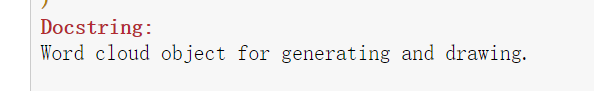

In [2]:
dir(wordcloud.WordCloud)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'fit_words',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'process_text',
 'recolor',
 'to_array',
 'to_file',
 'to_html',
 'to_image',
 'to_svg']

插入一下 `dir`的用法

In [3]:
# dir 如果没有参数，默认返回 项目属性 和 模块
dir()

['In',
 'Out',
 '_',
 '_1',
 '_2',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'autopep8',
 'exit',
 'get_ipython',
 'json',
 'quit',
 'wordcloud']

# 一个简单的词云

我们生成一个简单词云 并用image
绘出来 

In [12]:
# 设置背景为白色
wcd = wordcloud.WordCloud(background_color='white')

In [13]:
text = 'hello world python windows css html javascript'
# 生成词云
wcd.generate(text) # Generate  wordcloud from text.

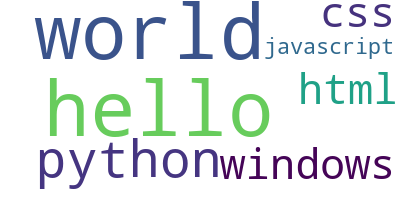

In [17]:
wcd.to_image()

从中可以看见单词很散，很少， 我们对 **词云对象** 添加两个属性， `repeat = true`（重复） `max_words` (最大词数）  


# 优化词云
（重复词，限制词数，放大图片,限制最大单词大小）

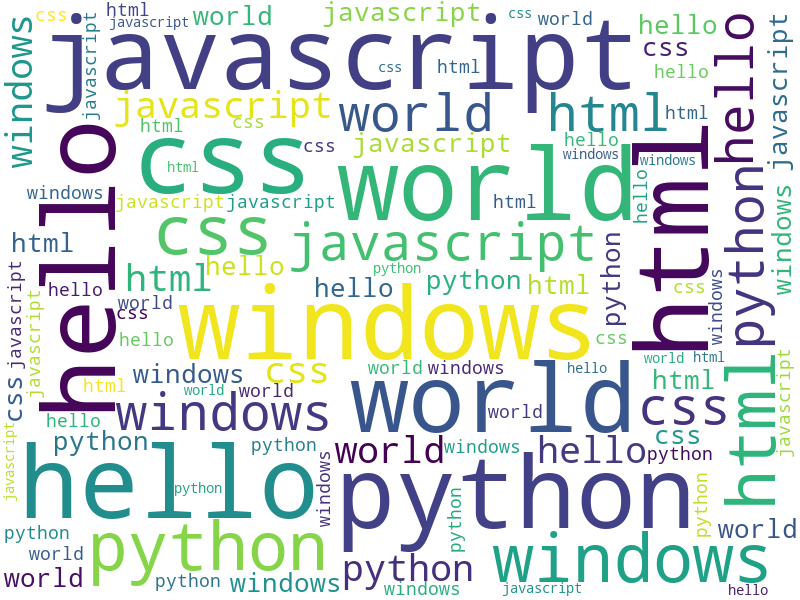

In [19]:
# 设置背景为白色，单词重复，词数限制，放大长宽
wcd1 = wordcloud.WordCloud(background_color='white',repeat=True,max_words=100,width=800,height=600,max_font_size=100)

wcd1.generate(text)
wcd1.to_image()

# 中文版词云

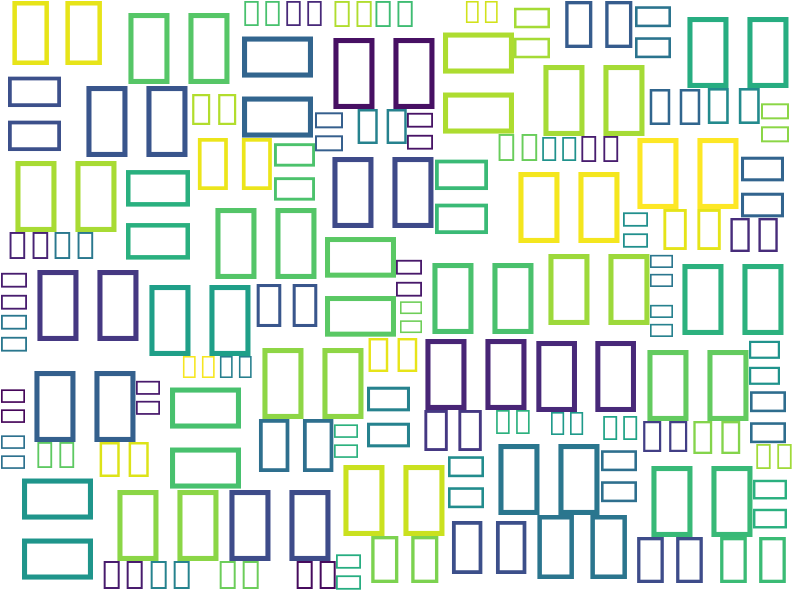

In [29]:
zh_hans_text = "自由、平等、公正、法治。自由、平等、公正、法治"

wcd_zh_hans = wordcloud.WordCloud(background_color='white',repeat=True,max_words=100,width=800,height=600,max_font_size=100)

wcd_zh_hans.generate(zh_hans_text)
wcd_zh_hans.to_image()

可以发现 编码问题出现了。


解决方案： 修改 `font path` 为中文字体路径

> 中文字体路径在哪里找呢，在 C:\Windows\Fonts 


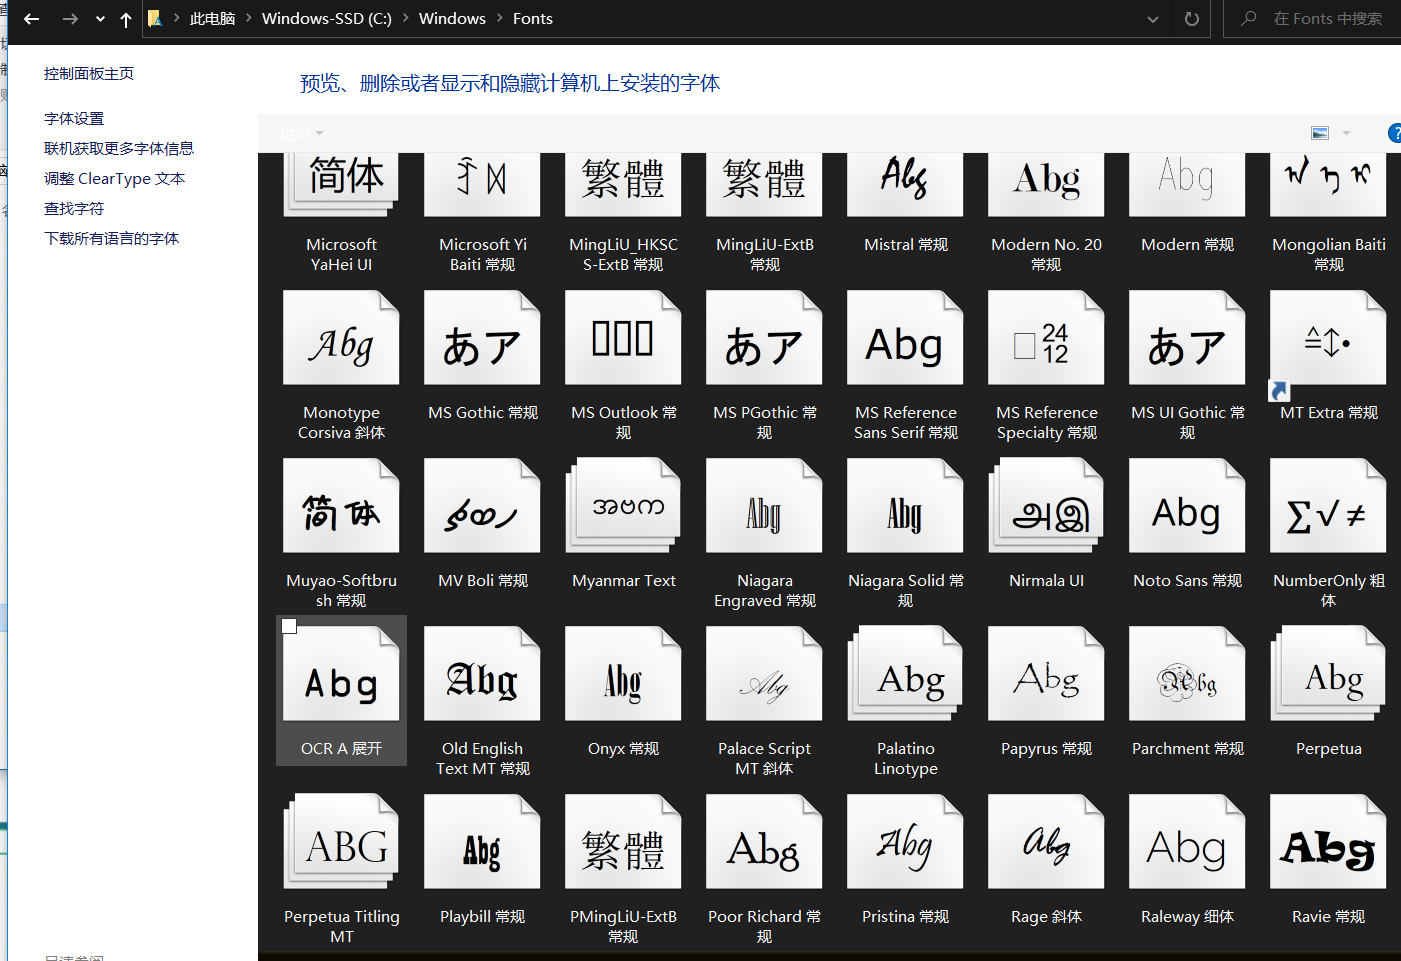


> 我们直接将所需要的字体复制到项目根路径下使用

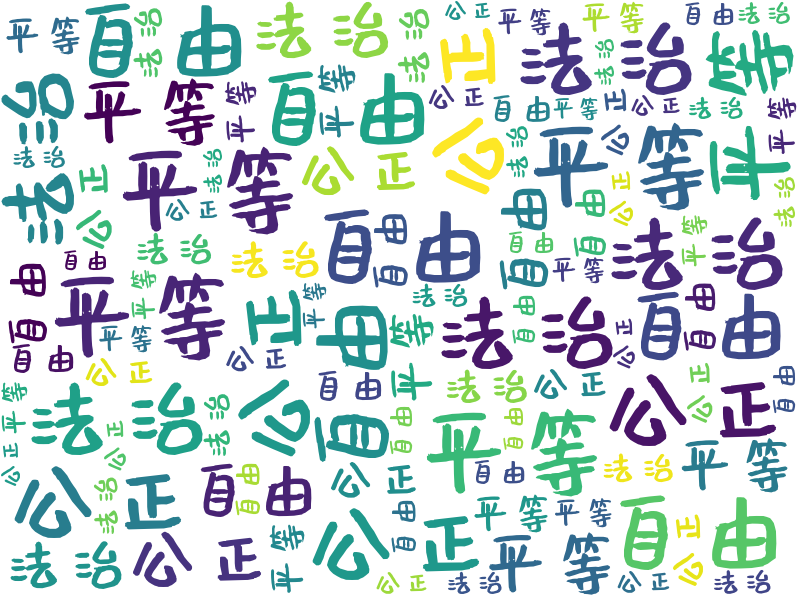

In [30]:
wcd_zh_hans = wordcloud.WordCloud(font_path='./../font/Muyao.TTF',background_color='white',repeat=True,max_words=100,width=800,height=600,max_font_size=100)

wcd_zh_hans.generate(zh_hans_text)
wcd_zh_hans.to_image()


## colormap 修改主色调
> 我们希望修改一下颜色风格，我们查看一下 `colormap` 介绍
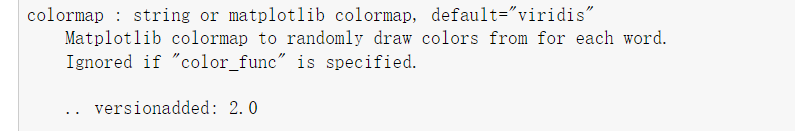


    也就说只能用 `matplotlib`库的颜色地图，我们去到对应官网
 https://www.matplotlib.org.cn/gallery/color/colormap_reference.html
 
 >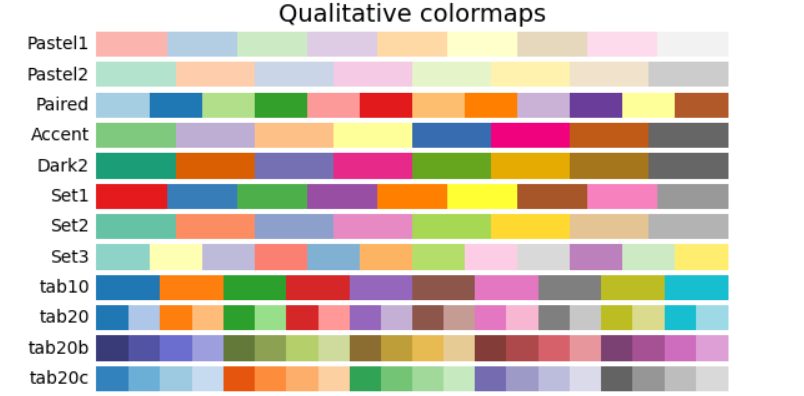

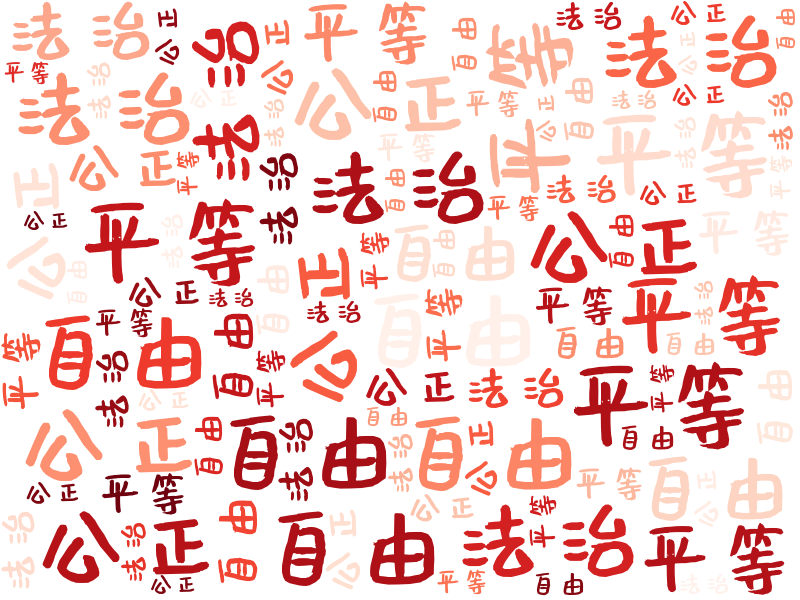

In [31]:
wcd_zh_hans = wordcloud.WordCloud(font_path='./../font/Muyao.TTF/',colormap='Reds',background_color='white',repeat=True,max_words=100,width=800,height=600,max_font_size=100)

wcd_zh_hans.generate(zh_hans_text)
wcd_zh_hans.to_image()

## 修改部分字体的颜色

此时我们对主色调已经比较满意，但是我们希望可以对一些特别的字体换另外一种颜色，可以使用 方法 `recolor()` 重新绘制颜色

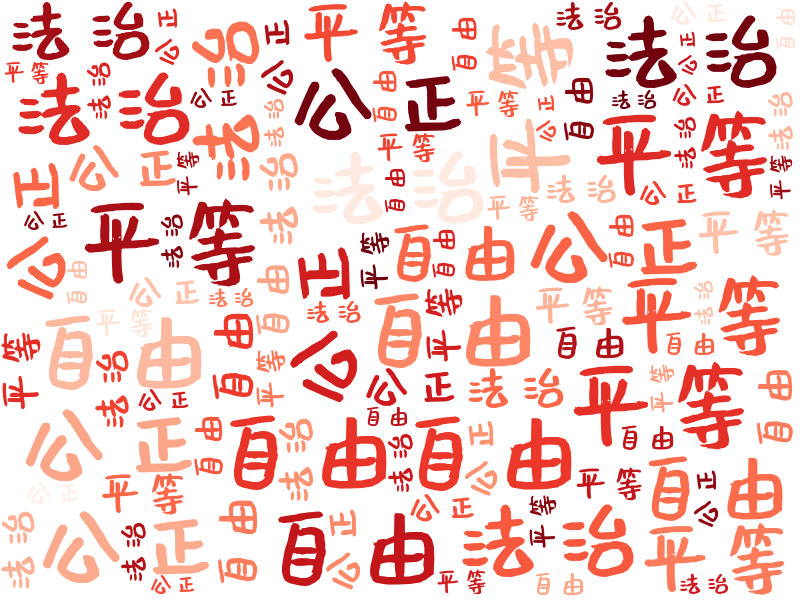

In [32]:
wcd_zh_hans.recolor() # 重新渲染颜色
wcd_zh_hans.to_image()

# 自定义轮廓（根据图片）


使用 `mask` 参数 （面罩）
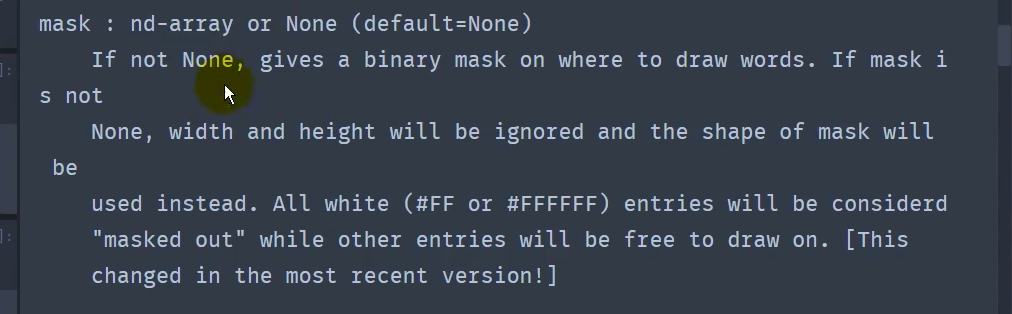

对应参数是numpy 中的 array数组，将图片用`PIL`库打开 使用矩阵表示出来（图像本质就是矩阵）


>> 默认mask表示为binary(二进制),如果有对应的`mask` 那么会自动忽略长宽，也就是不会进行默认的长方形图片显示，会被所给图片大小替代，其次如果图片有**白底**（#ff 或者 #ffffff)，那么此白底会被忽略，不会被渲染！ 相当于边框！

导入`PIL` (Pillow) 导入 `numpy` 库

In [8]:
mask = np.array(PIL.Image.open('china.png'))
# 图像本质就是矩阵

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

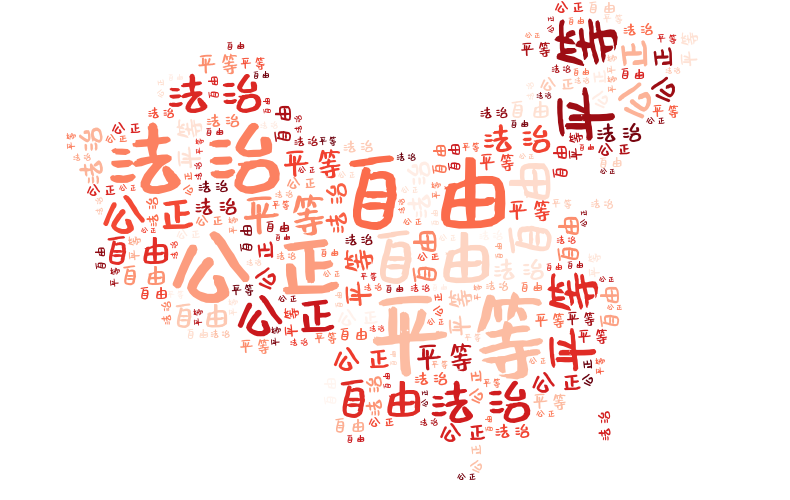

In [34]:
wcd_zh_hans = wordcloud.WordCloud(font_path='./../font/Muyao.TTF/',mask=mask,colormap='Reds',background_color='white',repeat=True,max_words=200,width=800,height=600,max_font_size=100)

wcd_zh_hans.generate(zh_hans_text)
wcd_zh_hans.to_image()

## 添加边框和边框颜色
可以看到没有边框，此时我们想要边框可加上 `contour` 属性

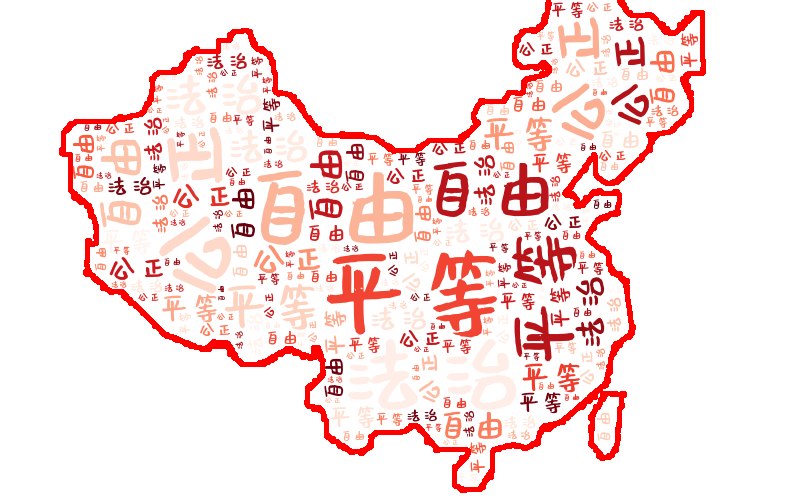

In [35]:
wcd_zh_hans = wordcloud.WordCloud(font_path='./../font/Muyao.TTF/',contour_width=8,contour_color='red',mask=mask,colormap='Reds',background_color='white',repeat=True,max_words=200,width=800,height=600,max_font_size=100)

wcd_zh_hans.generate(zh_hans_text)
wcd_zh_hans.to_image()

## 保存图片🎉
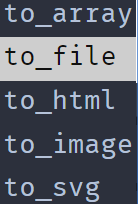

In [38]:
wcd_zh_hans.to_file('china_wordcloud.png')

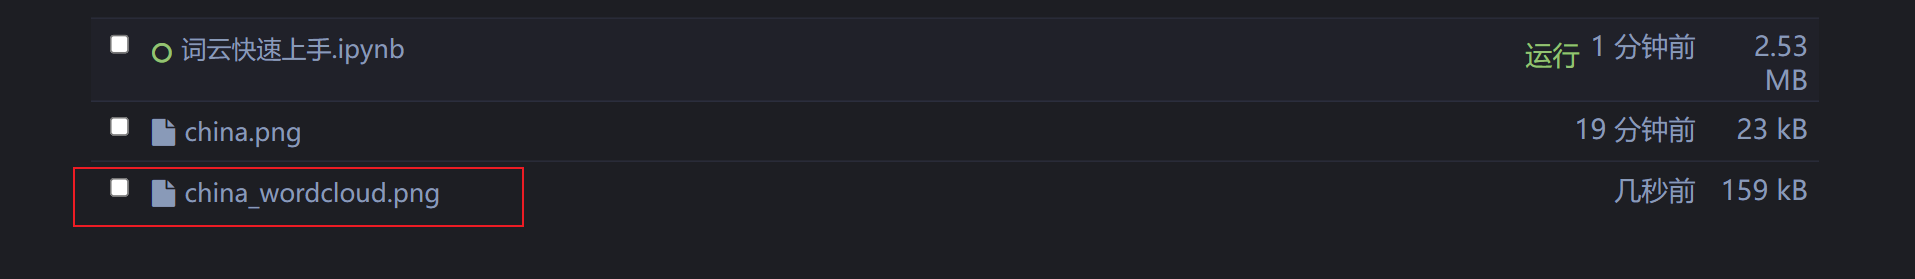

## 修改图片背景为透明色
> 但是出现一个问题：就是所生成的图片背景是白色的，而不是透明的，这样如果有需求还需要借助第三方工具变成透明

解决方法： 修改 `mode` （默认为`RGB`) 为 `RGBA` ， 并设置背景颜色为 `None`(必须在 RGBA 下有效，不然默认还是黑色背景）


|参数|颜色|取值|
|--|--|--|
R| 红色值。正整数 | 百分数
G| 绿色值。正整数 | 百分数
B| 蓝色值。正整数 | 百分数
A| Alpha透明度 | 0~1(颜色的透明度)|

此色彩模式与RGB相同,RGB定义了颜色的红绿蓝值,在RGB模式上新增了Alpha透明度.

In [43]:
wcd_zh_hans = wordcloud.WordCloud(font_path='./../font/Muyao.TTF/',mode='RGBA',contour_width=8,contour_color='white',mask=mask,colormap='Reds',background_color=None,repeat=True,max_words=200,width=800,height=600,max_font_size=100)

wcd_zh_hans.generate(zh_hans_text)
wcd_zh_hans.to_image()

ValueError: operands could not be broadcast together with shapes (500,790,4) (500,790,3) 

>根据报错，我们看到 图片和边框线contour的图层 不同，这是一直以来的`bug`,到目前还没有修复😂。


 解决办法： 去除边框线属性

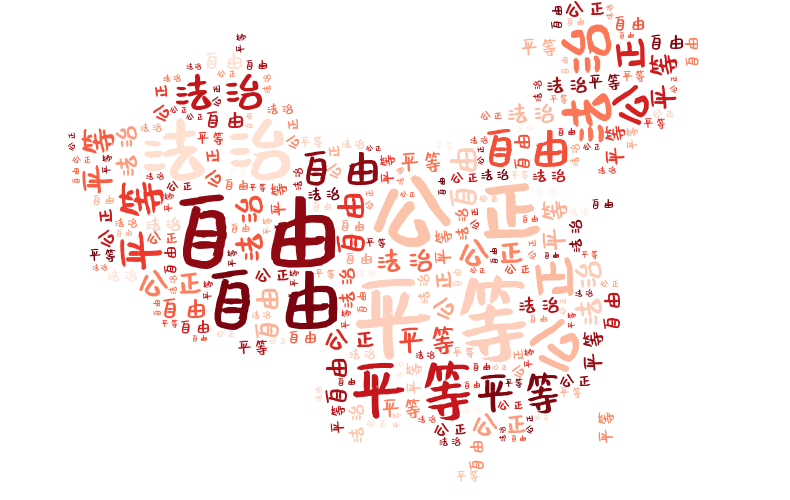

In [44]:
wcd_zh_hans = wordcloud.WordCloud(font_path='./../font/Muyao.TTF/',mode='RGBA',mask=mask,colormap='Reds',background_color=None,repeat=True,max_words=200,width=800,height=600,max_font_size=100)

wcd_zh_hans.generate(zh_hans_text)
wcd_zh_hans.to_image()

perfect!!🎉

In [45]:
wcd_zh_hans.to_file('china_wordcloud_transparent.png')

# 处理大块文本

有时候我们的文本并不是像 

`zh_hans_text = "自由、平等、公正、法治。自由、平等、公正、法治"`
处理好


通常情况下是这样： 

`text="核心价值观是一个国家的重要稳定器。一个民族、一个国家的核心价值观必须同自身的历史文化相契合,同自身正在进行的奋斗相结合，同自身需要解决的时代问题相适应。可以说，社会主义核心价值观培育和践行的过程，也是转型社会重建现代价值秩序的过程。在社会从传统向现代的转型过程中，人们的价值观念也发生了深刻的变化，同自身正在进行的奋斗相结合，同自身需要解决的时代问题相适应.可以说，社会主义核心价值观培育和践行的过程，也是转型社会重建现代价值秩序的过程.在社会从传统向现代的转型过程中，人们的价值观念也发生了深刻的变化，`

> 1. 可以使用**中文分词第三方库** `ieba(结巴库) ` ,该库适用于快速上手，但是准确率相比之下比较低
2. 更高的准确率可以使用北京大学开源的**中文分词第三方库** `pkumsg`(peking university segentation)
 


博客园 优质好文讲解
https://www.cnblogs.com/python-xkj/p/9247265.html

> 基本使用：
- `jieba.cut` 方法接受三个输入参数: 需要分词的字符串；`cut_all` 参数用来控制是否采用全模式（默认为False)；HMM 参数用来控制是否使用 HMM 模型
-----

- `jieba.cut_for_search` 方法接受两个参数：需要分词的字符串；是否使用 `HMM` 模型。该方法适合用于搜索引擎构建倒排索引的分词，粒度比较细
待分词的字符串可以是 `unicode` 或 `UTF-8` 字符串、`GBK` 字符串。注意：不建议直接输入 `GBK` 字符串，可能无法预料地错误解码成 `UTF-8`
-----
- `jieba.cut` 以及 `jieba.cut_for_search` 返回的结构都是一个可迭代的 `generator`，可以使用 `for `循环来获得分词后得到的每一个词语(`unicode`)，或者用
 `jieba.lcut` 以及 `jieba.lcut_for_search` 直接返回 `list`
 
-----
 
- `jieba.Tokenizer(dictionary=DEFAULT_DICT)` 新建自定义分词器，可用于同时使用不同词典。`jieba.dt` 为默认分词器，所有全局分词相关函数都是该分词器的映射。




**结巴分词0.4版本以上支持四种分词模式**：

|模式|效果|
|--|--|
|精确模式|试图将句子最精确地切开，适合文本分析|
|全模式|把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义|
|搜索引擎模式|在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词|
|paddle模式|利用PaddlePaddle深度学习框架，训练序列标注（双向GRU）网络模型实现分词。同时支持词性标注。（应该是百度提供的分词模型），缺点之一是在面对大数据时耗时很大|


In [66]:
text="核心价值观是一个国家的重要稳定器。一个民族、一个国家的核心价值观必须同自身的历史文化\
相契合,同自身正在进行的奋斗相结合，同自身需要解决的时代问题相适应。可以说，社会主义核心价值\
观培育和践行的过程，也是转型社会重建现代价值秩序的过程。在社会从传统向现代的转型过程中，人们\
的价值观念也发生了深刻的变化，同自身正在进行的奋斗相结合，同自身需要解决的时代问题相适应.可以\
说，社会主义核心价值观培育和践行的过程，也是转型社会重建现代价值秩序的过程.在社会从传统向现\
代的转型过程中，人们的价值观念也发生了深刻的变化，"

jieba.lcut(text)

['核心',
 '价值观',
 '是',
 '一个',
 '国家',
 '的',
 '重要',
 '稳定器',
 '。',
 '一个',
 '民族',
 '、',
 '一个',
 '国家',
 '的',
 '核心',
 '价值观',
 '必须',
 '同',
 '自身',
 '的',
 '历史',
 '文化',
 '相',
 '契合',
 ',',
 '同',
 '自身',
 '正在',
 '进行',
 '的',
 '奋斗',
 '相结合',
 '，',
 '同',
 '自身',
 '需要',
 '解决',
 '的',
 '时代',
 '问题',
 '相适应',
 '。',
 '可以',
 '说',
 '，',
 '社会主义',
 '核心',
 '价值观',
 '培育',
 '和',
 '践行',
 '的',
 '过程',
 '，',
 '也',
 '是',
 '转型',
 '社会',
 '重建',
 '现代',
 '价值',
 '秩序',
 '的',
 '过程',
 '。',
 '在',
 '社会',
 '从',
 '传统',
 '向',
 '现代',
 '的',
 '转型',
 '过程',
 '中',
 '，',
 '人们',
 '的',
 '价值观念',
 '也',
 '发生',
 '了',
 '深刻',
 '的',
 '变化',
 '，',
 '同',
 '自身',
 '正在',
 '进行',
 '的',
 '奋斗',
 '相结合',
 '，',
 '同',
 '自身',
 '需要',
 '解决',
 '的',
 '时代',
 '问题',
 '相适应',
 '.',
 '可以',
 '说',
 '，',
 '社会主义',
 '核心',
 '价值观',
 '培育',
 '和',
 '践行',
 '的',
 '过程',
 '，',
 '也',
 '是',
 '转型',
 '社会',
 '重建',
 '现代',
 '价值',
 '秩序',
 '的',
 '过程',
 '.',
 '在',
 '社会',
 '从',
 '传统',
 '向',
 '现代',
 '的',
 '转型',
 '过程',
 '中',
 '，',
 '人们',
 '的',
 '价值观念',
 '也',
 '发生',
 '了',
 '深刻',
 '的',
 '变化',
 '，']

## 处理分词后的字符串
1. 使用`.join`将每个字符串`' '`连接起来，**词云会自动去除标点符号**，
( 使用方法类似`re.sub`替换： `# 删除特殊符号
sentence = re.sub('[\'!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘\'！[\\]^_`{|}~\s]+', "", sentence)` 
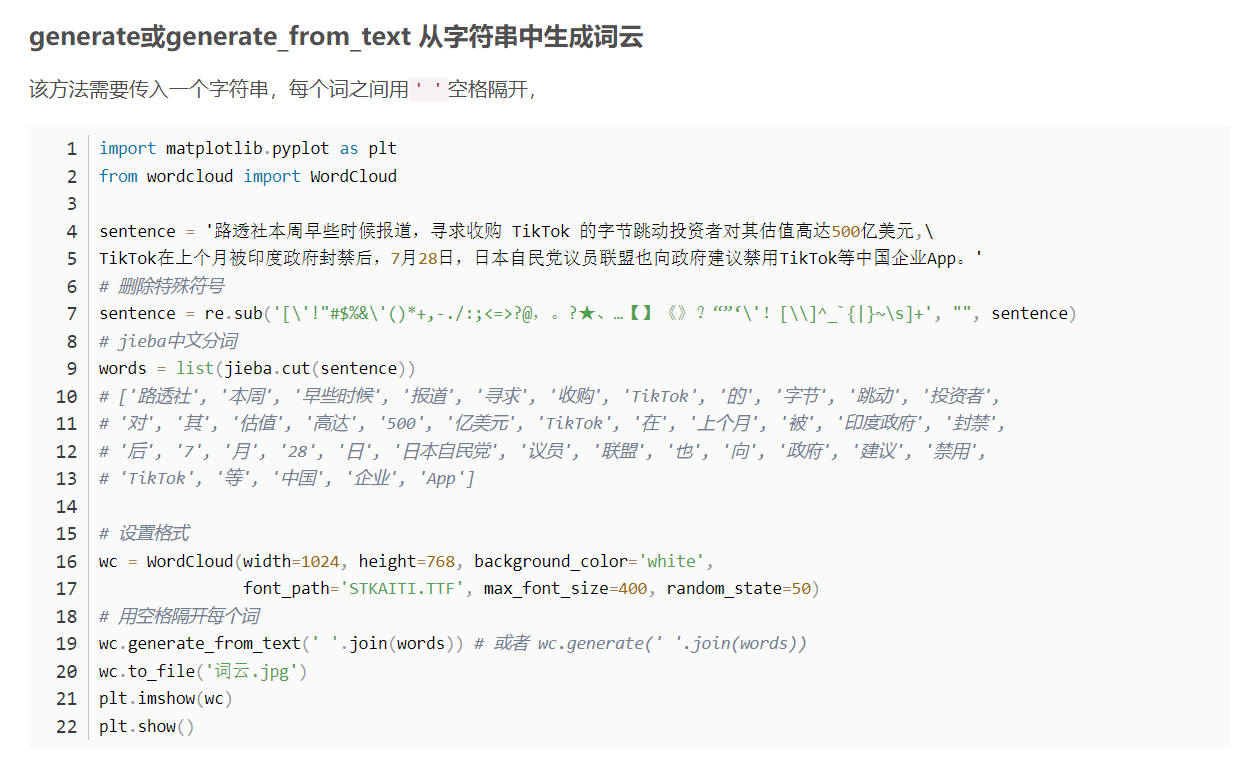


2. 也可以使用 计数好的字典 生成词云
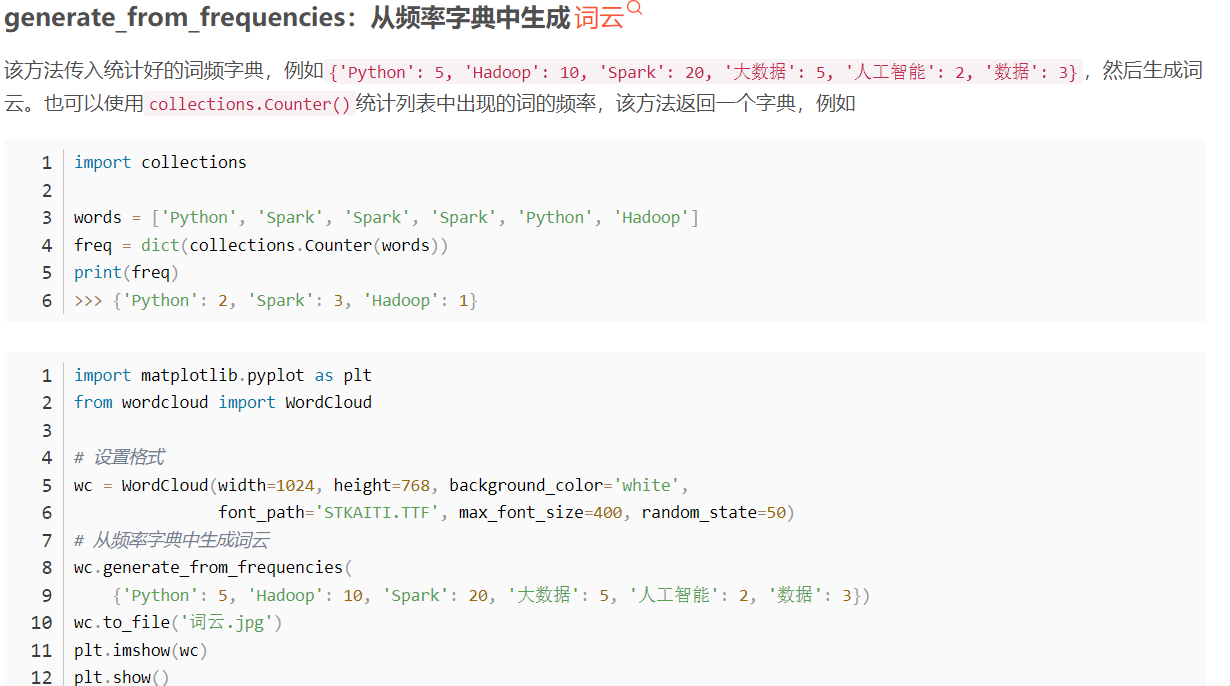


In [64]:
jieba_text = ' '.join(jieba.lcut(text))
jieba_text

"核心 价值观 是 一个 国家 的 重要 稳定器 。 一个 民族 、 一个 国家 的 核心 价值观 必须 同 自身 的 历史 文化 相 契合 , 同 自身 正在 进行 的 奋斗 相结合 ， 同 自身 需要 解决 的 时代 问题 相适应 。 可以 说 ， 社会主义 核心 价值观 培育 和 践行 的 过程 ， 也 是 转型 社会 重建 现代 价值 秩序 的 过程 。 在 社会 从 传统 向 现代 的 转型 过程 中 ， 人们 的 价值观念 也 发生 了 深刻 的 变 , ' . ' . ' . ' . ' ; . ; ' , ) * ) &% ^ & $ 化 ， 同 自身 正在 进行 的 奋斗 相结合 ， 同 自身 需要 解决 的 时代 问题 相适应 . 可以 说 ， 社会主义 核心 价值观 培育 和 践行 的 过程 ， 也 是 转型 社会 重建 现代 价值 秩序 的 过程 . 在 社会 从 传统 向 现代 的 转型 过程 中 ， 人们 的 价值观念 也 发生 了 深刻 的 变化 ，"

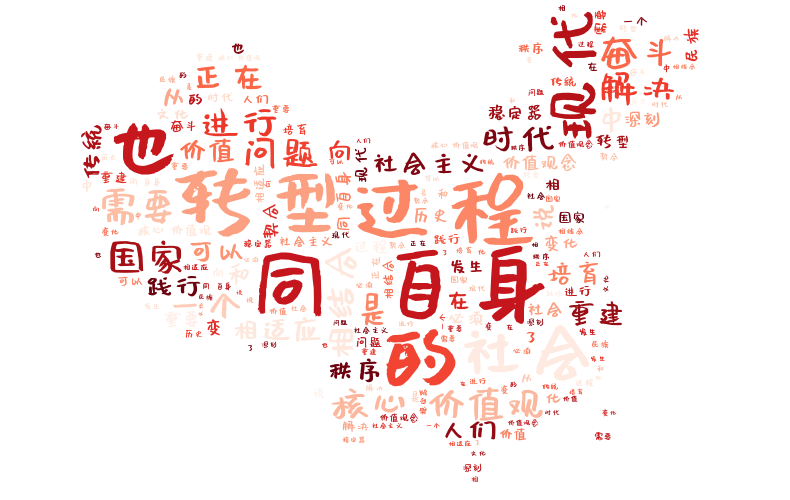

In [65]:
wcd_zh_hans.generate(jieba_text)
wcd_zh_hans.to_image()

In [62]:
wcd_zh_hans.to_file('china_wordcloud_jiaba.png')